In [8]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrame
%matplotlib inline

In [4]:
import os 
os.chdir("/Users/eddy/Downloads/")

In [5]:
data = pd.read_csv("Wholesale customers data.csv")

In [6]:
print ("Dataset has {} rows, {} columns".format(*data.shape))
print (data.head())  # print the first 5 rows

Dataset has 440 rows, 8 columns
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


# Feature Transformation
Here we do some feature transformation and apply PCA



[[ -4.20223371e-06   3.32885015e-06   9.76536846e-01   1.21184070e-01
    6.15403925e-02   1.52364619e-01  -7.05417374e-03   6.81047102e-02]
 [  2.42933998e-05   5.75410266e-07  -1.10613856e-01   5.15802159e-01
    7.64606385e-01  -1.87234545e-02   3.65350762e-01   5.70792132e-02]
 [ -1.40636434e-05  -1.81488052e-06  -1.78557260e-01   5.09886754e-01
   -2.75780885e-01   7.14200374e-01  -2.04409871e-01   2.83217475e-01]
 [  3.48624788e-06   1.10408563e-05   4.18764803e-02   6.45640468e-01
   -3.75460488e-01  -6.46292316e-01  -1.49380125e-01   2.03957876e-02]
 [  6.86267245e-08   1.33539849e-05  -1.59859967e-02  -2.03235658e-01
    1.60291504e-01  -2.20186117e-01  -2.07930164e-01   9.17076589e-01]
 [ -3.10033196e-05   2.41744090e-07  -1.57631603e-02   3.34918735e-02
    4.10938945e-01  -1.32889796e-02  -8.71284275e-01  -2.65416871e-01]
 [ -4.54785678e-02  -9.98965314e-01   3.58651763e-06   4.46809064e-06
   -3.88476933e-07  -1.14587246e-05  -2.33476077e-06   1.23898578e-05]
 [ -9.9896531

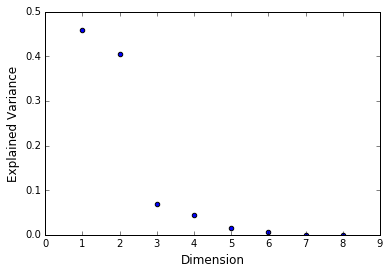

In [11]:
from sklearn.decomposition import PCA
n = min(data.shape)
pca = PCA(n_components=n).fit(data)

# Print the components and the amount of variance in the data contained in each dimension
print (pca.components_)
print ('\n', pca.explained_variance_ratio_)

#plot data
plt.scatter(range(1,n+1), pca.explained_variance_ratio_)
plt.xlabel('Dimension', size=12)
plt.ylabel('Explained Variance', size=12)
plt.ylim(0)

# truth table from dot products between each row vector combo as check for orthonormality
# note the preparation for rounding errors
dot_matrix = [(0.99999999 < sum(pca.components_[i] * pca.components_[j]) < 1.00000001) if j==i #unit vector check
              else (abs(sum(pca.components_[i] * pca.components_[j])) < 1e-10) #orthogonality check
              for i in range(n)
              for j in range(i,n) ]
print ('\nThe principal components are %sorthonormal' % (('not ', '')[all(dot_matrix)]))

#another way to check for orthonormality of the principal component vectorsis the following: if the principal 
#components matrix is orthogonal, the principal component vectors within it must be orthonormal.
#A matrix is orthogonal if that matrix multiplied by its transpose equals the identity matrix. In other words, a 
#matrix whose transpose is also its inverse is orthogonal
U = np.matrix(pca.components_).T
truth_matrix = abs((U.T * U) - np.identity(n)) < np.full((n, n),1e-10)
print ('The principal component matrix is %sorthogonal' % (('not ', '')[truth_matrix.all()]))

# ICA

In [13]:
from sklearn.decomposition import FastICA
n = min(data.shape)
ica = FastICA(n_components=n, random_state=42).fit(data)

# Print the independent components
print (ica.components_)

#check to see if IC matrix is orthogonal
W = np.matrix(ica.components_)
truth_matrix = abs((W.T * W) - np.identity(n)) < np.full((n, n),1e-10)
print ('\nThe independent component matrix is %sorthogonal' % (('not ', '')[truth_matrix.all()]))

#check to see if IC's are unit vectors
square_matrix = [(0.99999999 < sum(ica.components_[i] * ica.components_[i]) < 1.00000001) 
              for i in range(n) ]
print ('The independent components are %sunit vectors' % (('not ', '')[all(square_matrix)]))

#check to see if IC's are orthogonal
cross_matrix =  [(abs(sum(ica.components_[i] * ica.components_[j])) < 1e-10) #orthogonality check
              for i in range(n)
              for j in range(i+1,n)]
print ('The independent components are %sorthogonal' % (('not ', '')[all(cross_matrix)]))

[[  1.83070110e-02  -6.16387997e-02   1.93586655e-07   9.62328525e-08
    8.31184864e-07  -2.17511049e-08  -2.14288511e-06   5.82380072e-07]
 [ -1.24749874e-04  -3.31411369e-03   3.56211145e-07  -1.82040513e-06
   -1.30426343e-05   1.32690857e-06   2.79630353e-05   5.77237267e-06]
 [  1.52052621e-02   6.03391512e-04  -1.00769862e-07  -1.00419988e-05
    5.77083514e-06   5.57610622e-07  -3.15233880e-06   6.07222305e-06]
 [ -1.13626632e-01  -5.42566393e-03  -3.09219127e-07   4.64330036e-07
   -3.10505668e-07  -1.39854188e-06   1.69024232e-06   4.01270500e-07]
 [  5.35066525e-03   2.58540256e-03  -8.27175491e-07  -2.14830066e-07
    7.31279814e-07   1.12231771e-05  -7.01830001e-07  -6.00389491e-06]
 [ -7.53537240e-03   1.43958287e-03  -4.17618661e-07  -1.78966170e-07
   -6.51411466e-07  -5.90281336e-07   7.96879897e-07   1.81214524e-05]
 [ -7.06965262e-02   2.39253954e-03  -1.10046155e-08  -1.42976459e-06
    4.22089410e-06  -1.31045165e-07   6.13379358e-06  -3.90763301e-07]
 [ -8.4515193

# Clustering


In [14]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [15]:
PCMatrix = PCA(n_components=2).fit(data).components_
reduced_data = np.dot(data, PCMatrix.T)
print (reduced_data[:10])  # print up to 10 elements

[[ 14112.07286187  10409.72074012]
 [  9035.24575869  12866.65315373]
 [  8620.05203237  11402.96382083]
 [ 14452.39718675   2544.39563154]
 [ 24120.04947361   6664.47584439]
 [ 10696.08914905   7864.3309207 ]
 [ 12746.49985026   6811.19938447]
 [  8987.467073    10253.6986178 ]
 [  6749.95534974   6618.29246472]
 [  8638.41637693  22304.76084683]]


In [18]:
lowest_BIC = np.infty
for n_components in range(1,11):
    for covariance_type in ('spherical', 'tied', 'diag', 'full'):
        gmm = GMM(n_components, covariance_type, random_state=42)
        this_clustering = gmm.fit(reduced_data)
        this_BIC = gmm.bic(reduced_data)
        if this_BIC < lowest_BIC:
            lowest_BIC, clusters = this_BIC, gmm

print (clusters.fit(reduced_data))

//anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
//anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
//anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
//anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multiva

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=8, n_init=1, n_iter=100, params='wmc', random_state=42,
  tol=0.001, verbose=0)


//anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
//anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
//anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
//anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_

In [19]:
# identify which customers are in which cluster
x = data['Cluster'] = clusters.predict(reduced_data)

# print cluster sample counts and averages
for i in range(clusters.n_components):
    count = data[x==i].shape[0]
    print ('There %s %s sample%s in Cluster %s' % (('is', 'are')[count>1], count, ('', 's')[count>1], i))
    print ('Here is what %s Cluster %s customer%s buys from the wholesale distributor:' % (
        ('the', 'a typical')[count>1], i, ('','s')[count>1]))
    print (data[x==i][list(data.columns[:-1])].mean(),'\n')

//anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


There are 83 samples in Cluster 0
Here is what a typical Cluster 0 customers buys from the wholesale distributor:
Channel                 1.662651
Region                  2.506024
Fresh                2149.674699
Milk                 7534.144578
Grocery             12095.048193
Frozen               1297.361446
Detergents_Paper     5258.325301
Delicassen           1244.012048
dtype: float64 

There are 122 samples in Cluster 1
Here is what a typical Cluster 1 customers buys from the wholesale distributor:
Channel                 1.016393
Region                  2.508197
Fresh               12426.024590
Milk                 1572.221311
Grocery              1984.680328
Frozen               3645.377049
Detergents_Paper      340.131148
Delicassen            801.868852
dtype: float64 

There are 77 samples in Cluster 2
Here is what a typical Cluster 2 customers buys from the wholesale distributor:
Channel                 1.506494
Region                  2.688312
Fresh               18608.415

In [20]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

//anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


In [22]:
centroids = clusters.means_
print(centroids)

[[   4058.55882755   14247.16726887]
 [  13007.0861342     1162.68369692]
 [  19022.98336355    7791.09815926]
 [  33154.0280434    54512.96245167]
 [  39822.67626892     411.02527027]
 [ 117325.47605639   18734.55133898]
 [   5925.19361031    3552.54612418]
 [  10690.43524131   23789.07522191]]


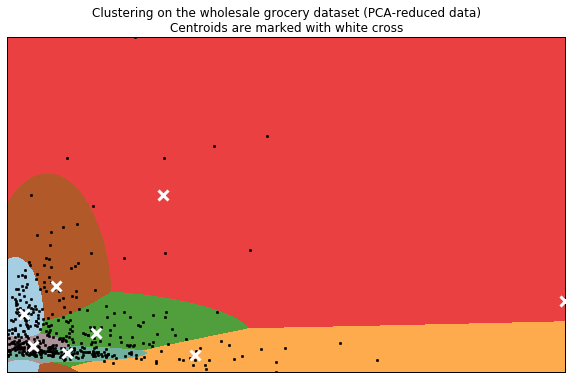

In [27]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1,figsize=(10,6))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=100, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()